In [6]:
from typing import List
from IPython.display import Image

https://company-wise-leetcode-farneet.netlify.app/ - ссылка, по которой можно посмотреть, в каких компаниях встречается задача на собеседовании

Ниже я буду прикреплять:
1. Мое решение
2. Решение преподавателя с моими комментариями
3. Решение преподавателя без комментариев

# Задача 1. 1480
https://leetcode.com/problems/running-sum-of-1d-array/description/

# Мое решение

In [7]:
class Solution:
    def runningSum(self, nums: List[int]) -> List[int]:
        prefix_sum = []
        for i in range(len(nums)):
            prefix_sum.append(sum(nums[:i+1]))       
        return prefix_sum

# Решение преподавателя

In [8]:
class Solution:
    def runningSum(self, nums: List[int]) -> List[int]:
        n = len(nums) #Длина массива
        prefix_sum = [0] * n #Заполняем нулями массив длины n [0, 0, 0, 0]
        prefix_sum[0] = nums[0] #Объявление первого элемента вручную, тк в части prefix_sum[i-1] при индексе 0, код уйдет в -1 - это не верно. 
        # p[i] = p[i-1] + arr[i] 
        for i in range(1, n): #Начинаем перебор с первого индекса для обхода ошибки prefix_sum[i-1]
            prefix_sum[i] = prefix_sum[i - 1] + nums[i]
        return prefix_sum

In [9]:
class Solution:
    def runningSum(self, nums: List[int]) -> List[int]:
        n = len(nums) 
        prefix_sum = [0] * n 
        prefix_sum[0] = nums[0] 
        # p[i] = p[i-1] + arr[i] 
        for i in range(1, n):
            prefix_sum[i] = prefix_sum[i - 1] + nums[i]
        return prefix_sum

# Задача 2. 2574
https://leetcode.com/problems/left-and-right-sum-differences/description/

# Мое решение

In [10]:
class Solution:
    def leftRightDifference(self, nums: List[int]) -> List[int]:
        n = len(nums)
        prefix_sum = [0] * n
        prefix_sum[0] = nums[0]
        diff = [0] * n
        if n in [0, 1]:
            return [0]
        else:
            for i in range(1, n):
                prefix_sum[i] = prefix_sum[i-1] + nums[i]

            diff[0] = prefix_sum[-1] - prefix_sum[0]
            for n in range(1, n):
                diff[n] = abs((prefix_sum[-1] - prefix_sum[n]) - (prefix_sum[n-1]))
            return diff

# Решение преподавателя

In [11]:
class Solution:
    def leftRightDifference(self, nums: List[int]) -> List[int]:
        n = len(nums)
        prefix_sum = [0] * n
        prefix_sum[0] = nums[0]
        suffix_sum = [0] * n
        suffix_sum[-1] = nums[-1]

        for i in range(1, n):
            prefix_sum[i] = prefix_sum[i-1] + nums[i]

        for i in range(n-2, -1, -1):
            suffix_sum[i] = suffix_sum[i+1] + nums[i]

        answ = []
        for i in range(n):
            left_sum = 0
            right_sum = 0
            if i-1 >= 0:
                left_sum = prefix_sum[i-1]
            if i+1 <= n-1:
                right_sum = suffix_sum[i+1]
            answ.append(abs(left_sum - right_sum))
        return answ

# Задача 3. 1732
https://leetcode.com/problems/find-the-highest-altitude/

# Логика

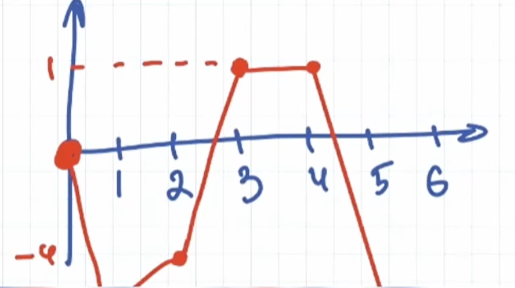

In [12]:
Image(filename='images/1732.png', width='50%') 

# Мое решение

In [13]:
class Solution:
    def largestAltitude(self, gain: List[int]) -> int:
        n = len(gain)
        prefix_sum = [0] * n
        prefix_sum[0] = gain[0]

        for i in range(1, n):
            prefix_sum[i] = prefix_sum[i-1] + gain[i]
        
        prefix_sum.insert(0, 0)
        return max(prefix_sum)

# Решение преподавателя

In [14]:
class Solution:
    def largestAltitude(self, gain: List[int]) -> int:
        n = len(gain)
        prefix_sum = [0] * (n+1)
        prefix_sum[0] = 0

        for i in range(1, n+1):
            prefix_sum[i] = prefix_sum[i-1] + gain[i-1]
        
        return max(prefix_sum)

# Задача 4. 2848
https://leetcode.com/problems/points-that-intersect-with-cars/description/

# Логика

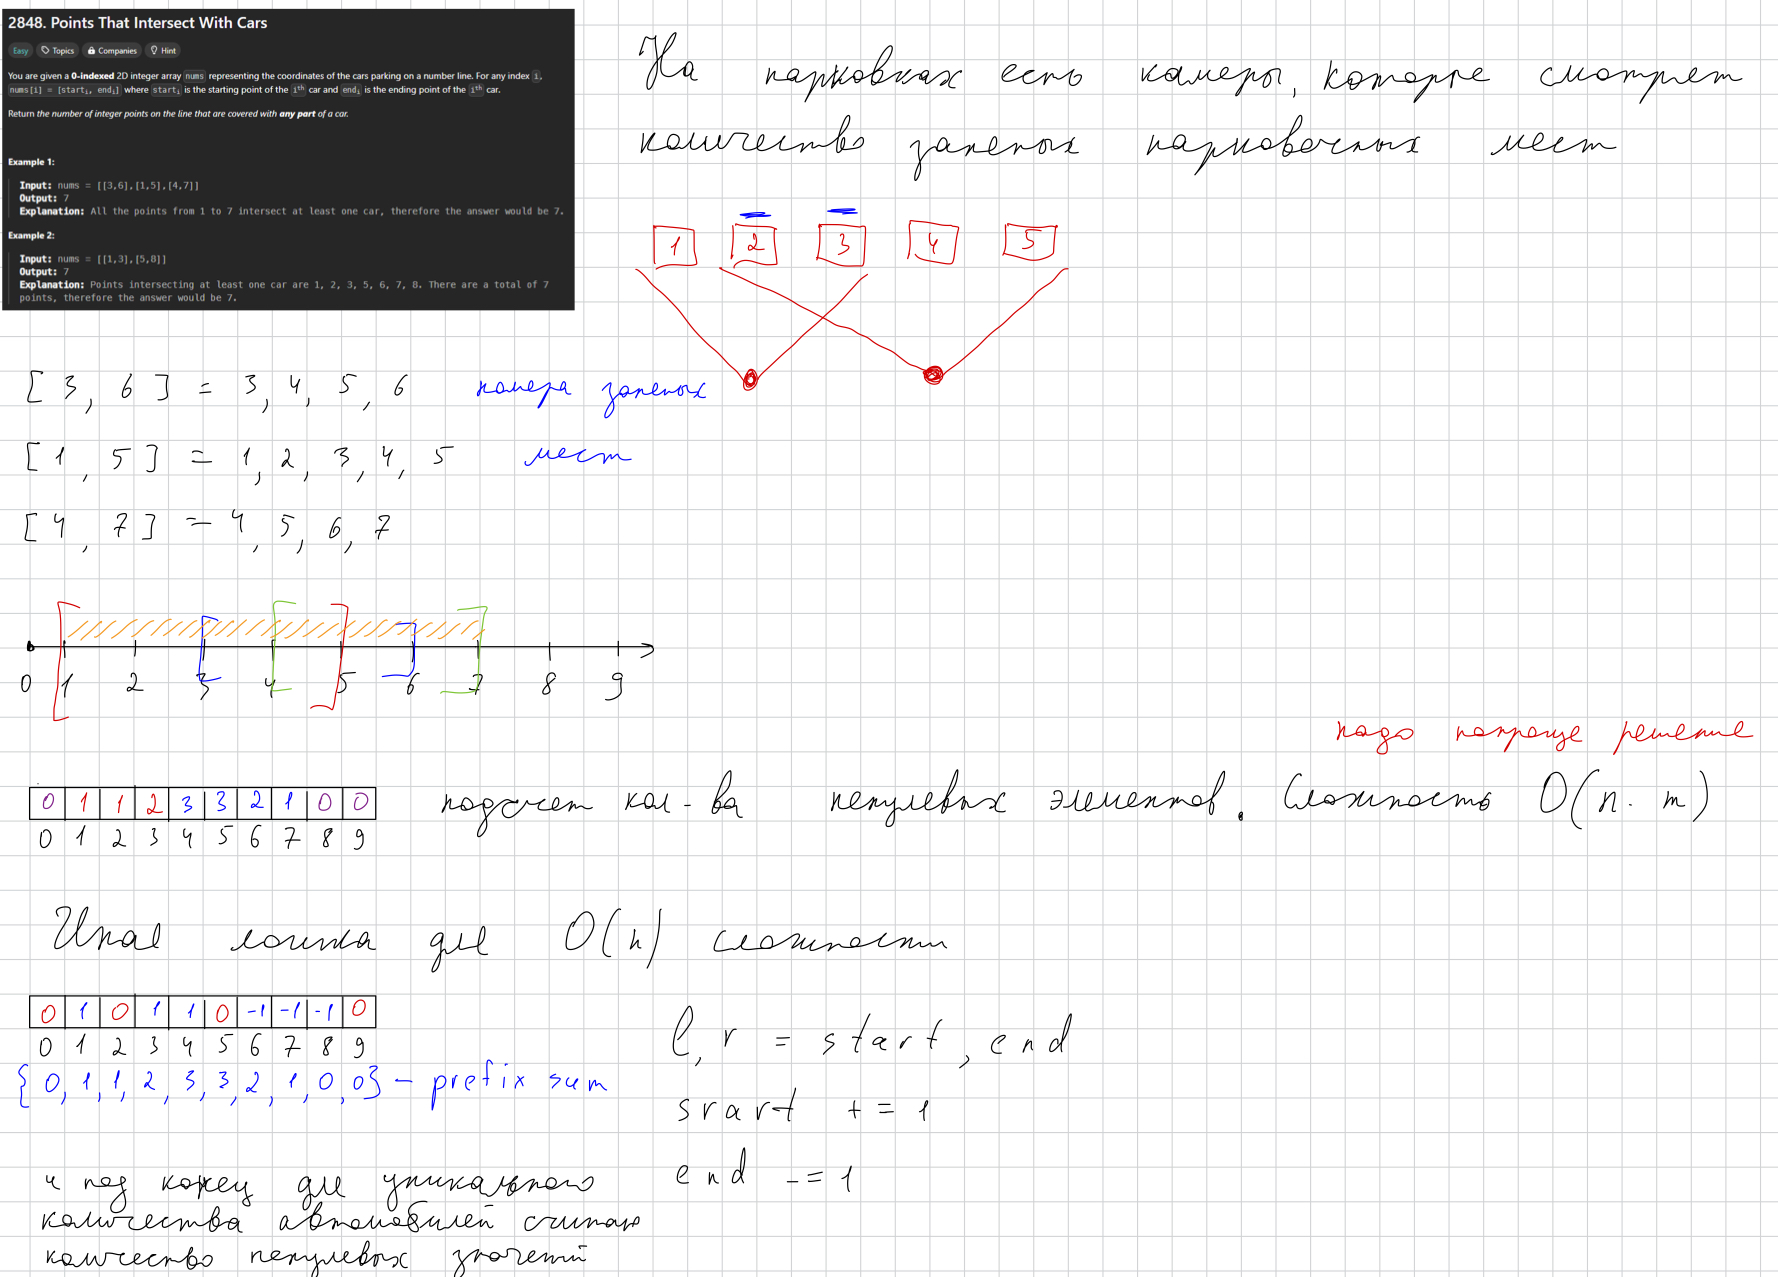

In [15]:
Image(filename='images/2848.jpg', width='80%') 

# Решение преподавателя

## 1-й способ

In [16]:
class Solution:
    def numberOfPoints(self, nums: List[List[int]]) -> int:
        is_used = [0] * 102 #По условию: 1 <= starti <= endi <= 100. n+1 = 101 индекс, по факту 102 элемента.
        for start, end in nums:
            is_used[start] += 1
            is_used[end+1] -= 1
        prefix_sum = [0] * 102
        prefix_sum[0] = is_used[0]
        for i in range(1, 102):
            prefix_sum[i] = prefix_sum[i-1] + is_used[i]
        answ = 0
        for elem in prefix_sum:
            if elem > 0:
                answ += 1
        return answ

# 2-й способ

In [17]:
class Solution:
    def numberOfPoints(self, nums: List[List[int]]) -> int:
        is_used = [0] * 102 #По условию: 1 <= starti <= endi <= 100. n+1 = 101 индекс, по факту 102 элемента.
        for start, end in nums:
            is_used[start] += 1
            is_used[end+1] -= 1
        for i in range(1, 102):
            is_used[i] += is_used[i-1]
        answ = 0
        return sum([1 for elem in is_used if elem > 0])

# Задача 5. 1991
https://leetcode.com/problems/find-the-middle-index-in-array/description/

# Решение преподавателя

In [18]:
class Solution:
    def findMiddleIndex(self, nums: List[int]) -> int:
        n = len(nums)
        prefix_sum = [0] * n
        prefix_sum[0] = nums[0]
        suffix_sum = [0] * n
        suffix_sum[-1] = nums[-1]

        for i in range(1, n):
            prefix_sum[i] = prefix_sum[i-1] + nums[i]

        for i in range(n-2, -1, -1):
            suffix_sum[i] = suffix_sum[i+1] + nums[i]

        answ = []
        for i in range(n):
            left_sum = 0
            right_sum = 0
            if i-1 >= 0:
                left_sum = prefix_sum[i-1]
            if i+1 <= n-1:
                right_sum = suffix_sum[i+1]
            if left_sum == right_sum:
                return i 
        return -1        

# Задача 6. 1893
https://leetcode.com/problems/check-if-all-the-integers-in-a-range-are-covered/description/

In [19]:
class Solution:
    def isCovered(self, ranges: List[List[int]], left: int, right: int) -> bool:
        is_used = [0] * 52
        for start, end in ranges:
            is_used[start] += 1
            is_used[end+1] -= 1
        for i in range(1, 52):
            is_used[i] += is_used[i-1]
        for i in range(left, right+1):
            if is_used[i] == 0:
                return False
        return True

# Задача 7. 1829
https://leetcode.com/problems/maximum-xor-for-each-query/description/

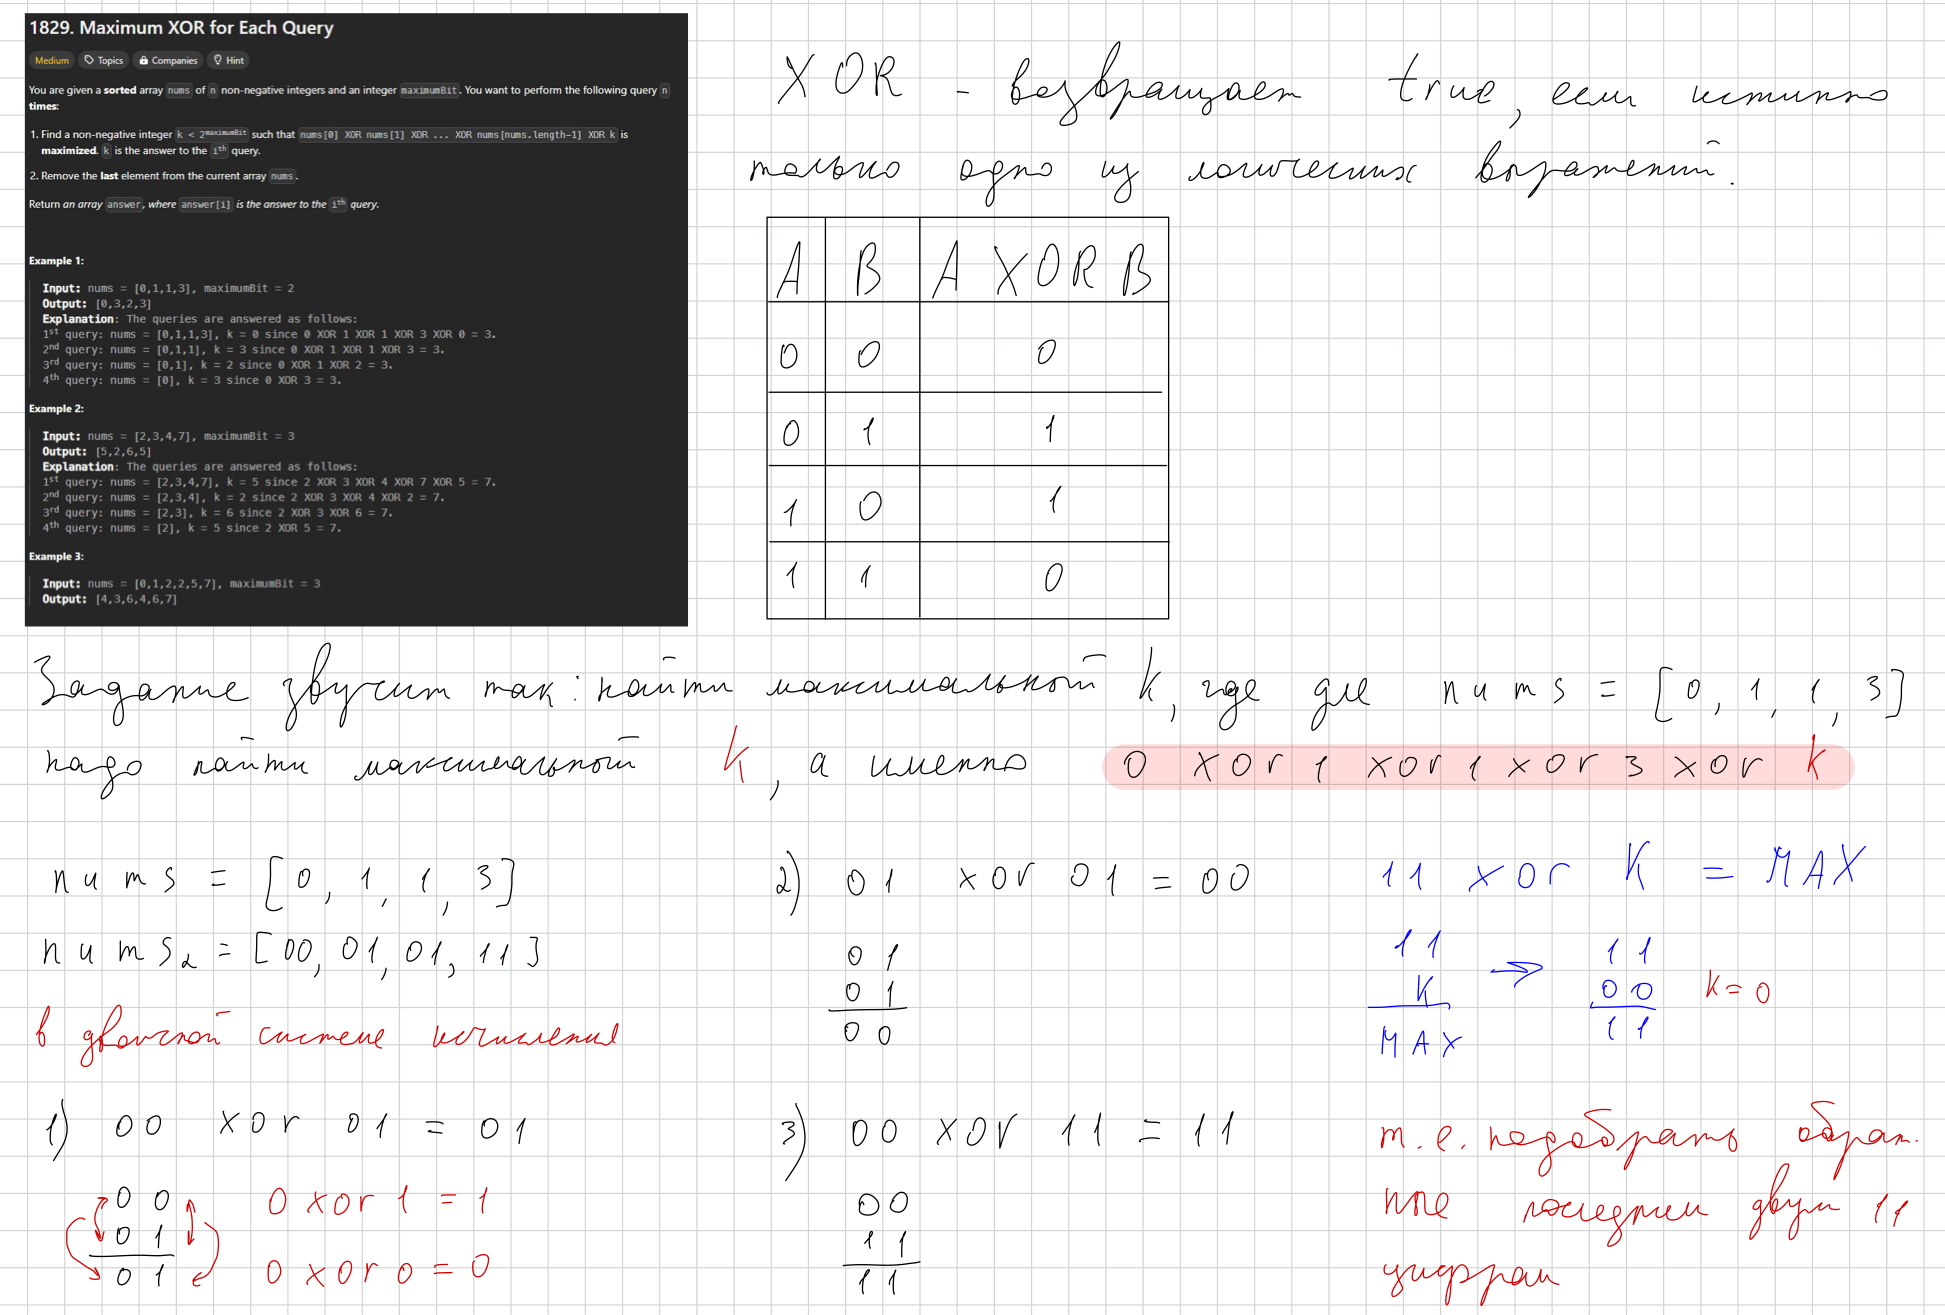

In [20]:
Image(filename='images/1829_1.jpeg', width='80%') 

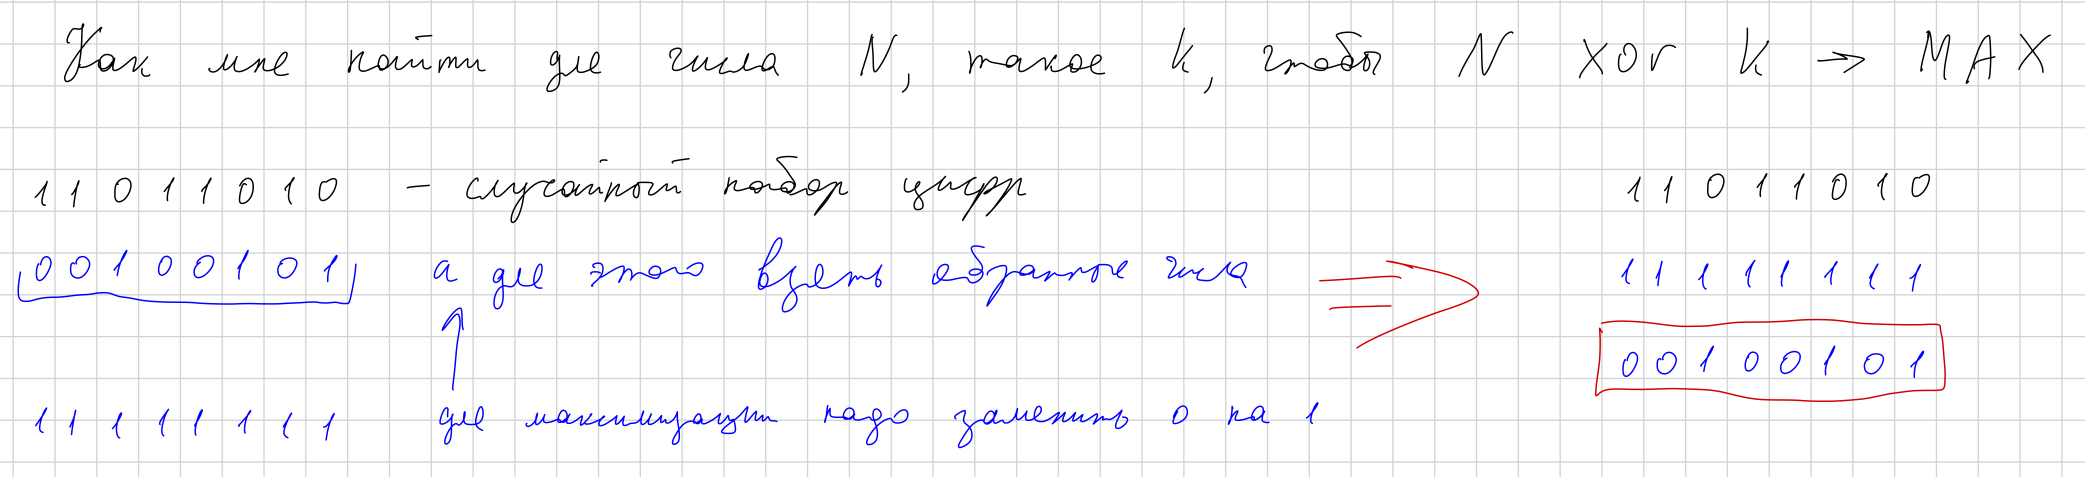

In [21]:
Image(filename='images/1829_2.jpeg', width='80%') 

In [22]:
class Solution:
    def getMaximumXor(self, nums: List[int], maximumBit: int) -> List[int]:
        n = len(nums)
        prefix_xor = [0] * n
        prefix_xor[0] = nums[0]
        for i in range(1, n):
            prefix_xor[i] = prefix_xor[i-1] ^ nums[i]  
        # max_k =2**maximumBit - 1 # Это плохой код, способ побыстрее ниже
        max_k = (1 << maximumBit) - 1 # Выражение a << b эквивалентно умножению числа a на 2**b. Здесь у меня 1, чтобы оптимизировать скорость. Тем более выше мы просто 2**maxbit
        answ = []
        for i in range(n):
            result = prefix_xor[n-i-1] ^ max_k
            answ.append(result)
        return answ

# Задача 8. 1314
https://leetcode.com/problems/matrix-block-sum/

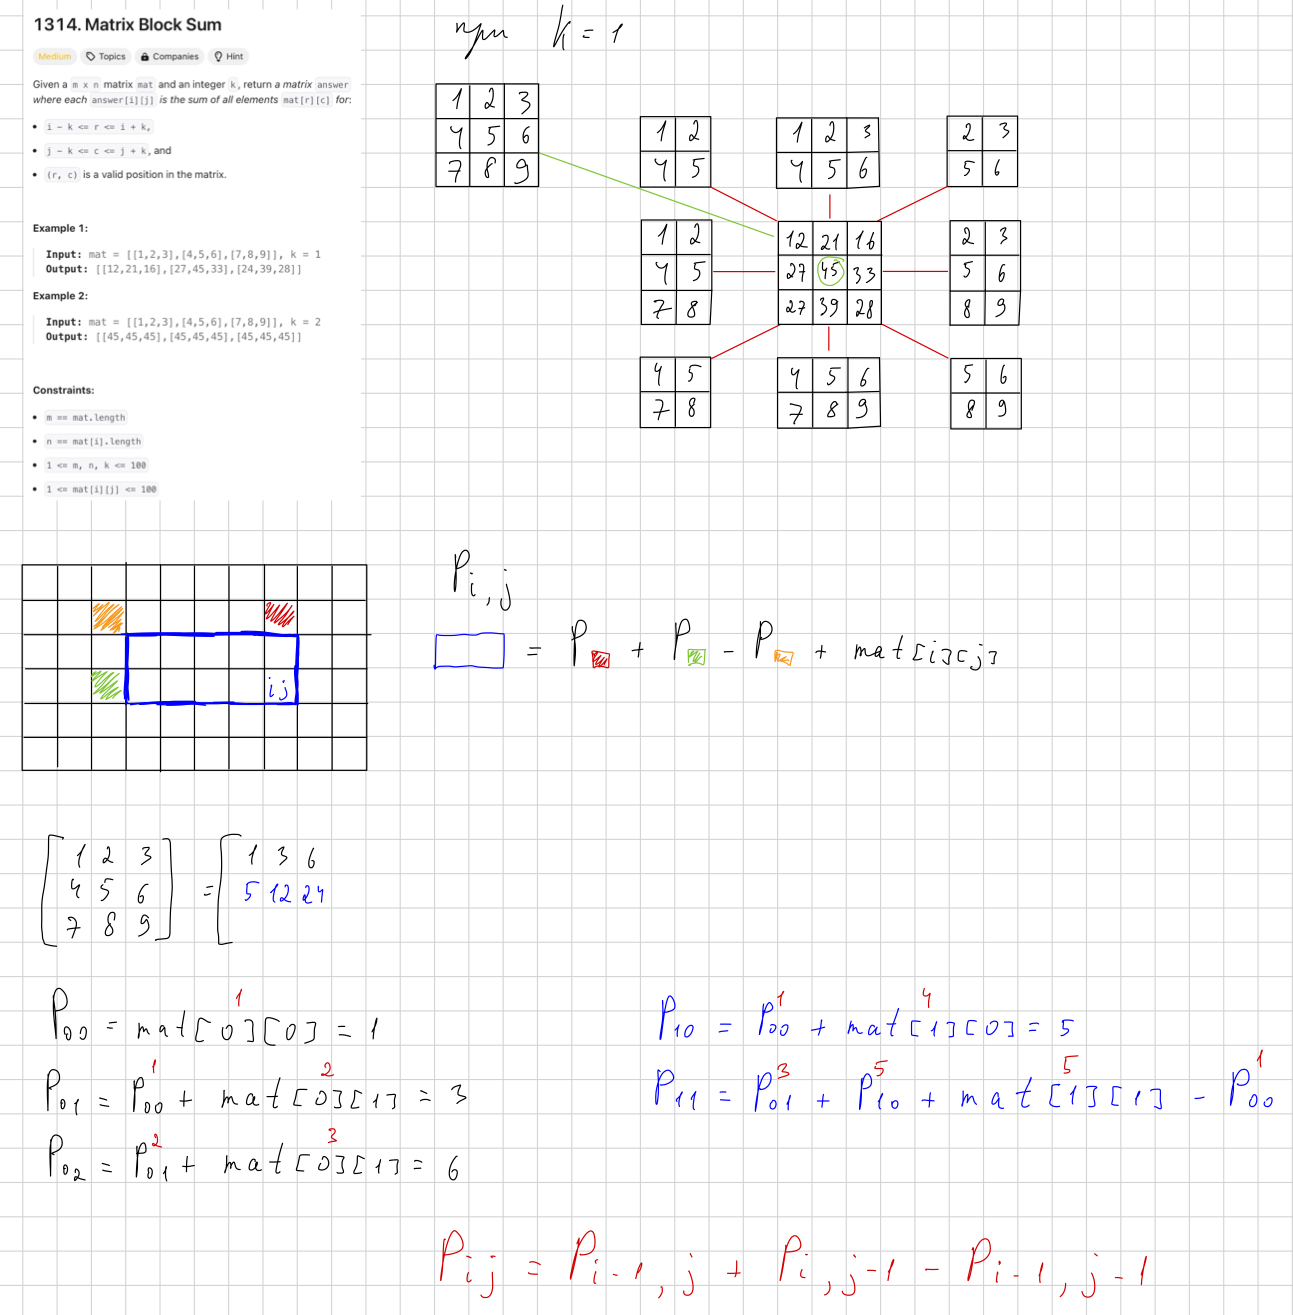

In [23]:
Image(filename='images/1314.jpeg', width='80%') 

In [24]:
class Solution:
    def matrixBlockSum(self, mat: List[List[int]], k: int) -> List[List[int]]:
        m = len(mat)
        n = len(mat[0])
        prefix_sum = [[0 for _ in range(n)] for _ in range(m)]
        for i in range(m):
            for j in range(n):
                prefix_sum[i][j] = mat[i][j]
                #P[i-1][j] + P[i][j-1] - P[i-1][j-1]
                if i-1 >= 0:
                    prefix_sum[i][j] += prefix_sum[i-1][j]
                if j-1 >= 0:
                    prefix_sum[i][j] += prefix_sum[i][j-1]
                if i-1 >= 0 and j-1 >=0:
                    prefix_sum[i][j] -= prefix_sum[i-1][j-1]
        ans = [[0 for _ in range(n)] for _ in range(m)]

        for i in range(m):
            for j in range(n):
                # i-k, j-k
                r1 = max(0, i-k)
                c1 = max(0, j-k)
                # i+k, j+k
                r2 = min(m-1, i+k)
                c2 = min(n-1, j+k)
                result = prefix_sum[r2][c2]
                if r1 > 0 and c1 > 0:
                    result += prefix_sum[r1-1][c1-1]
                if c1 > 0: 
                    result -= prefix_sum[r2][c1-1]
                if r1 > 0:
                    result -= prefix_sum[r1-1][c2]
                ans[i][j] = result
        return ans

# Задача 9. 2640
https://leetcode.com/problems/find-the-score-of-all-prefixes-of-an-array/description/

In [25]:
class Solution:
    def findPrefixScore(self, nums: List[int]) -> List[int]:
        max_prefix = nums[0]
        result = 0
        answ = []
        for i in range(len(nums)):
            max_prefix = max(max_prefix, nums[i])
            result += nums[i] + max_prefix
            answ.append(result)
        return answ